Notebook was used to look up and record the lobby difficulty and the number of kills obtained in COD: Warzone from a stat tracking website. Since the website was shut down and then reformatted...the elements would need to be updated for this to work.

In [59]:
import requests
from bs4 import BeautifulSoup
#update url with webpage for your account
URL = "https://sbmmwarzone.com/profile/USERNAME"
r = requests.get(URL)
soup = BeautifulSoup(r.content, 'html5lib')

games_element = soup.find_all('class', attrs = {'class':'game-session-matches'})

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="max-age=0" http-equiv="cache-control"/>
  <meta content="no-store" http-equiv="cache-control"/>
  <meta content="-1" http-equiv="expires"/>
  <meta content="Tue, 01 Jan 1980 1:00:00 GMT" http-equiv="expires"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <title>
   SBMM Warzone – Find the level of your Warzone lobby
  </title>
  <meta content="Find the KD of your Warzone lobby. Compare your lobbies with those of your friends and professional players." name="description"/>
  <meta content="SBMM" name="author"/>
  <meta content="SBMM 2020" name="copyright"/>
  <meta content="SBMM Warzone" name="application-name"/>
  <meta content="SBMM Warzone" property="og:title"/>
  <meta content="website" property="og:type"/>
 

In [35]:
sep_matches = matches.splitlines()
print(sep_matches)

['BR QUADS 03/14/21 17:17', '29', 'PLATINUM 1', 'KILLS', '1', 'DAMAGE', '555', 'GULAG', 'BR QUADS 03/14/21 17:06', '29', 'DIAMOND 4', 'KILLS', '1', 'DAMAGE', '254', 'GULAG', 'BR QUADS 03/14/21 16:43', '14', 'GOLD 1', 'KILLS', '2', 'DAMAGE', '920', 'GULAG', 'BR QUADS 03/14/21 16:27', '28', 'GOLD 1', 'KILLS', '4', 'DAMAGE', '1,343', 'GULAG', 'BR QUADS 03/14/21 16:15', '23', 'PLATINUM 3', 'KILLS', '1', 'DAMAGE', '697', 'GULAG', 'BR QUADS 03/14/21 16:02', '24', 'DIAMOND 1', 'KILLS', '4', 'DAMAGE', '1,770', 'GULAG', 'BR QUADS 03/14/21 15:32', '10', 'SILVER 1', 'KILLS', '0', 'DAMAGE', '659', 'GULAG', 'BR QUADS 03/14/21 14:58', '1', 'GOLD 1', 'KILLS', '5', 'DAMAGE', '3,432', 'GULAG', 'BR QUADS 03/14/21 14:51', '38', 'SILVER 3', 'KILLS', '0', 'DAMAGE', '108', 'GULAG', 'BR QUADS 03/14/21 14:22', '2', 'SILVER 2', 'KILLS', '3', 'DAMAGE', '1,730', 'GULAG', '-', 'BR TRIOS 03/14/21 14:12', '45', 'GOLD 2', 'KILLS', '0', 'DAMAGE', '18', 'GULAG']


In [36]:
for x in sep_matches:
    if x == '-':
        sep_matches.remove(x)
        

In [37]:
match_time = sep_matches[::8]
placement = sep_matches[1::8]
lobby = sep_matches[2::8]
kills = sep_matches[4::8]
damage = sep_matches[6::8]


In [51]:
import pandas as pd

dic = {'Match Time': match_time, 'Placement': placement, 'Lobby Skill': lobby, 'Kills': kills, 'Damage': damage}

eric_df= pd.DataFrame(dic)
eric_df["Damage"] = eric_df["Damage"].str.replace(",", "")
eric_df['Kills'] = eric_df['Kills'].astype(str).astype(int)
eric_df['Damage'] = eric_df['Damage'].astype(str).astype(int)

eric_df['Lobby Skill'] = eric_df['Lobby Skill'].str[:-2]

eric_df['Damage'].dtype


dtype('int32')

In [52]:
eric_df['Player Name'] = 'Eric'

In [53]:
eric_df

,Match Time,Placement,Lobby Skill,Kills,Damage,Player Name
0,BR QUADS 03/14/21 17:17,29,PLATINUM,1,555,Eric
1,BR QUADS 03/14/21 17:06,29,DIAMOND,1,254,Eric
2,BR QUADS 03/14/21 16:43,14,GOLD,2,920,Eric
3,BR QUADS 03/14/21 16:27,28,GOLD,4,1343,Eric
4,BR QUADS 03/14/21 16:15,23,PLATINUM,1,697,Eric
5,BR QUADS 03/14/21 16:02,24,DIAMOND,4,1770,Eric
6,BR QUADS 03/14/21 15:32,10,SILVER,0,659,Eric
7,BR QUADS 03/14/21 14:58,1,GOLD,5,3432,Eric
8,BR QUADS 03/14/21 14:51,38,SILVER,0,108,Eric
9,BR QUADS 03/14/21 14:22,2,SILVER,3,1730,Eric


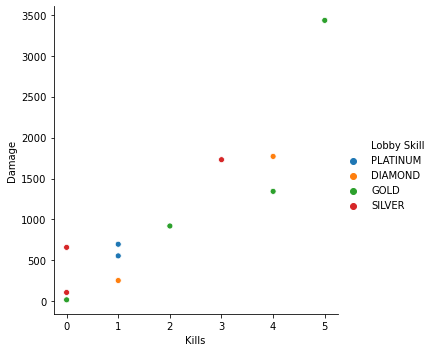

In [54]:
import seaborn as sns
import matplotlib as plt
sns.relplot(data= eric_df,
           x="Kills", y= "Damage", hue= "Lobby Skill")
